In [774]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats 
from sklearn.datasets import load_linnerud

In [775]:
linnerud = load_linnerud()

In [776]:
print(linnerud.target_names)

['Weight', 'Waist', 'Pulse']


In [777]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [778]:
df = pd.DataFrame(linnerud.data, columns = linnerud.feature_names)

In [779]:
df_target = pd.DataFrame(linnerud.target, columns = linnerud.target_names)

In [780]:
data = pd.concat([df, df_target], axis=1)

In [781]:
data

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [782]:
data.drop(columns=['Weight', 'Waist'], inplace=True)

In [783]:
data.shape

(20, 4)

In [784]:
data['Pulse'] = linnerud.target

In [785]:
data.head()

,Chins,Situps,Jumps,Pulse
0,5.0,162.0,60.0,191.0
1,2.0,110.0,60.0,189.0
2,12.0,101.0,101.0,193.0
3,12.0,105.0,37.0,162.0
4,13.0,155.0,58.0,189.0


In [786]:
from sklearn.model_selection import train_test_split

x_data=data.loc[:, ['Chins', 'Situps', 'Jumps']]
y_data=data.loc[:, 'Pulse']

X_train, X_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=12)

In [787]:
import numpy as np

mean = np.mean(X_train, axis = 0)

std = np.std(X_train, axis = 0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [788]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_test)))
print(np.any(np.isinf(X_train)))
print(np.any(np.isinf(X_test)))

False
False
False
False


In [789]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape=(3, )))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))

model.compile(optimizer='rmsprop', loss='mse', metrics = ['mae'])

model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_210 (Dense)           (None, 512)               2048      
                                                                 
 dense_211 (Dense)           (None, 128)               65664     
                                                                 
 dense_212 (Dense)           (None, 64)                8256      
                                                                 
 dense_213 (Dense)           (None, 16)                1040      
                                                                 
 dense_214 (Dense)           (None, 4)                 68        
                                                                 
Total params: 77,076
Trainable params: 77,076
Non-trainable params: 0
_________________________________________________________________


In [790]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, batch_size=64, validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 1s 569ms/step - loss: 31984.1719 - mae: 178.2266 - val_loss: 33425.5039 - val_mae: 181.5586
Epoch 2/100
1/1 [==============================] - 0s 35ms/step - loss: 31918.2812 - mae: 178.0415 - val_loss: 33335.1875 - val_mae: 181.3085
Epoch 3/100
1/1 [==============================] - 0s 34ms/step - loss: 31814.5625 - mae: 177.7494 - val_loss: 33209.6953 - val_mae: 180.9585
Epoch 4/100
1/1 [==============================] - 0s 33ms/step - loss: 31672.7637 - mae: 177.3492 - val_loss: 33053.1016 - val_mae: 180.5220
Epoch 5/100
1/1 [==============================] - 0s 37ms/step - loss: 31496.1504 - mae: 176.8489 - val_loss: 32850.9766 - val_mae: 179.9568
Epoch 6/100
1/1 [==============================] - 0s 34ms/step - loss: 31270.8516 - mae: 176.2084 - val_loss: 32591.2344 - val_mae: 179.2255
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 30982.0723 - mae: 175.3832 - val_loss: 32272.4414 - val_mae: 178.3251
Epoch

In [791]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 23ms/step - loss: 18065.1230 - mae: 92.1590


[18065.123046875, 92.15896606445312]

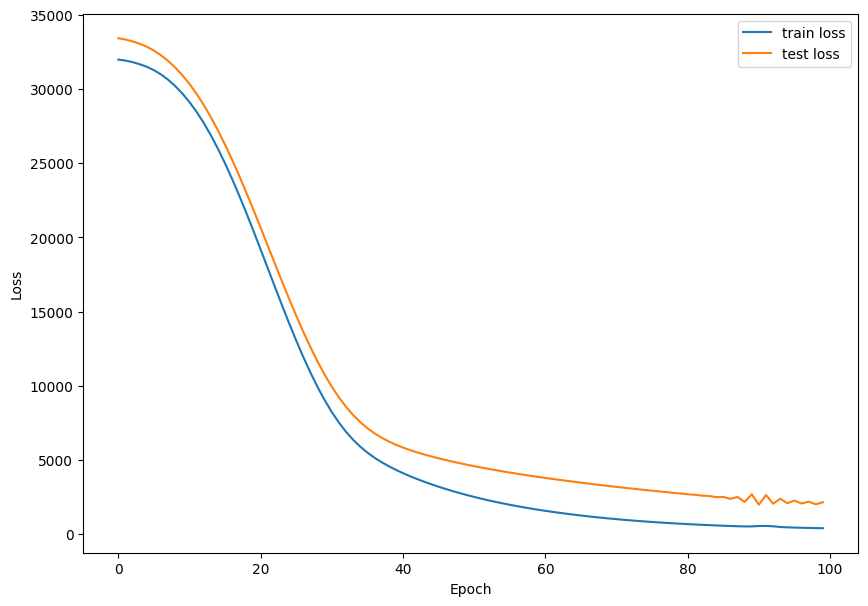

In [792]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

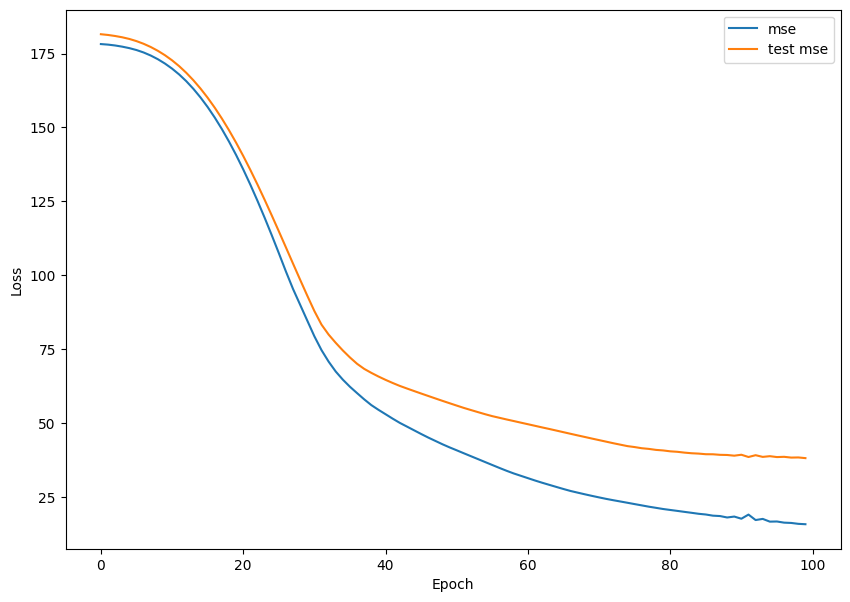

In [793]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mae'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mae'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()